# Case Study 1: From Exploration to Design

- Name: Yohei Ono
- Student ID:35522739
- Link to GitHub Repository: (https://github.com/2005yoheiUBC/dsci200_casestudy1)

This blank notebook is provided for you to use to answer questions from [Case Study 1](https://ubc-dsci.github.io/dsci-200/case-studies/case-study-1.html). 

In [13]:
#install.packages("devtools")
library(devtools)

In [14]:
#install.packages('tidyverse')
#devtools::install_github("lbelzile/hecedsm")
library(tidyverse)
library(hecedsm)



In [15]:
df <- BRLS21_EDA

## EDA 
<hr>

Data is from the article "**Smartwatches are more distracting than mobile phones while driving: Results from an experimental study** "

#### About Article


hyperlink: https://www.sciencedirect.com/science/article/abs/pii/S0001457520316663?via%3Dihub


This article explores distruction caused by smartwatches and mobile phones while driving. The main goal of this study was to investigate how using a smartwatch while driving influences driver distraction, compared to using a mobile phone or a voice-based system. Because smartwatches have become significantly popular and can deliver notifications similar to mobile phones, the researchers aimed to understand whether these easy-wear devices pose similar or different distraction risks in a driving context, where sustained attention to the road is paramount. The study also sought to compare how different types of notifications affect distraction, specifically, text messages versus voice messages, and the differences between sending or receiving these messages while driving. Understanding these effects is important for both road safety research and for informing policy or technology design to lower distraction.
The study implicitly tested hypotheses that smartwatch notifications would lead to greater distraction than smartphone notifications, and that voice-based communication would be less distracting than text notifications. These outcomes would clarify which modes of interaction pose the most risk during driving.

In [16]:
head(df)

id,reltime,task,occurence,eda,hr
<fct>,<int>,<fct>,<int>,<dbl>,<dbl>
1,0,baseline,1,20.60959,88.49560
1,1,baseline,1,21.41062,88.31564
1,2,baseline,1,22.26244,78.13892
1,3,baseline,1,24.22100,65.82009
1,4,baseline,1,24.23851,65.13290
1,5,baseline,1,23.63703,66.83456


In [17]:
glimpse(df)

Rows: 10,942
Columns: 6
$ id        <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ reltime   <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ task      <fct> baseline, baseline, baseline, baseline, baseline, baseline, …
$ occurence <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ eda       <dbl> 20.60959, 21.41062, 22.26244, 24.22100, 24.23851, 23.63703, …
$ hr        <dbl> 88.49560, 88.31564, 78.13892, 65.82009, 65.13290, 66.83456, …


The dataset size is 10942*6  : 10942 rows and 6 cols

### Features

| Feature | Var_Type | Explanation |
| --- | --- | ----- | 
| id | factor | Participant identifier|
| reltime | int | Relative time of the task| 
| task | factor | Task, one of baseline or distraction, either a notification from the cell, from a phone call voicecall or via the smartwatch (watch)|
| occurrence | int | Number of occurences |
| eda | double | Electrodermal activity measure|
| hr | double | Heart rate|


The dataset includes both quantitative measurements and qualitative groupings


In this case study, we do not need to convert any featurevalues. The data looks completely set.

In [18]:
tibble(
  variable = names(df),
  n_missing = colSums(is.na(df))
) 



variable,n_missing
<chr>,<dbl>
id,0
reltime,0
task,0
occurence,0
eda,214
hr,538


We can observe that col **eda** and col **hr** are missing many rows, and other cols do not miss any rows.

In [19]:
tibble(
  variable = names(df),
  n_missing = colSums(is.na(df)),
  prop_missing = colSums(is.na(df)) / nrow(df)
)


variable,n_missing,prop_missing
<chr>,<dbl>,<dbl>
id,0,0.00000000
reltime,0,0.00000000
task,0,0.00000000
occurence,0,0.00000000
eda,214,0.01955767
hr,538,0.04916834


The proportions of missing cols of **eda** and **hr** are 0.019 and 0.049, respectively, confirming no cols miss a huge amount of data like 20 %!! This suggests that missing data is unlikely to be a major concern for this dataset.

Let's see the relationship between the task and the hr col. 

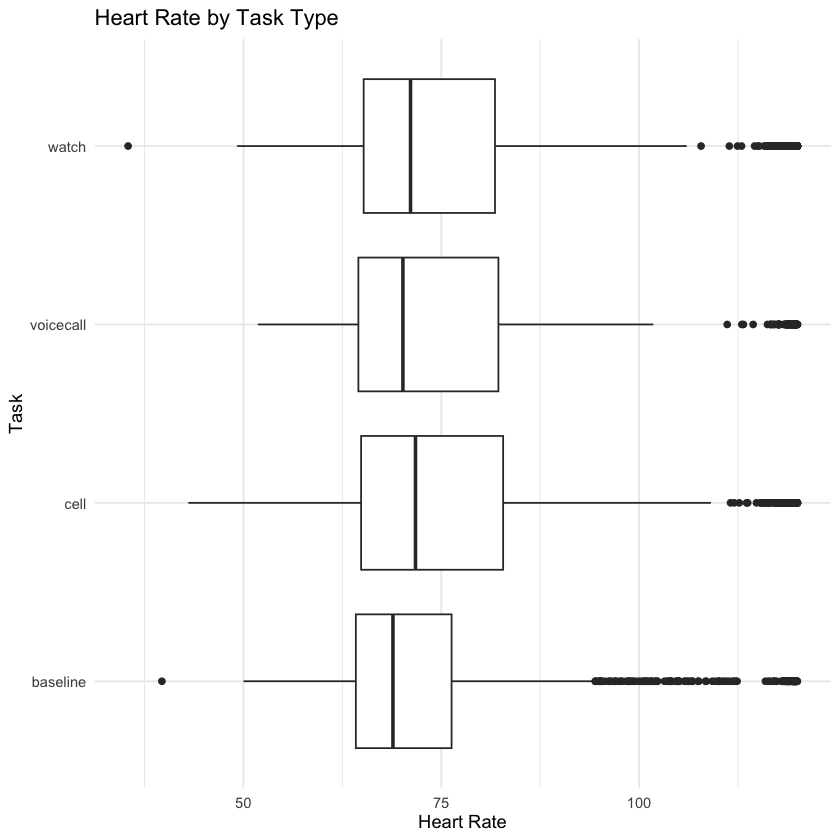

In [20]:
df |> 
    filter(!is.na(hr), !is.na(task)) |> 
    ggplot(aes(x = task, y = hr)) +
    geom_boxplot() +
    coord_flip() +
    labs(
        title = "Heart Rate by Task Type",
        x = "Task",
        y = "Heart Rate"
      ) +
    theme_minimal()


The boxplot shows that heart rate varies across different task types. Compared to the baseline condition, the distraction tasks (cell, voice call, and watch) generally have greater variability, although we don't see any significant difference in median heart rate. This suggests that engaging in distracting tasks may be associated with more variable physiological responses rather than a clear increase in typical heart rate.

### Distribution of Task Types ###

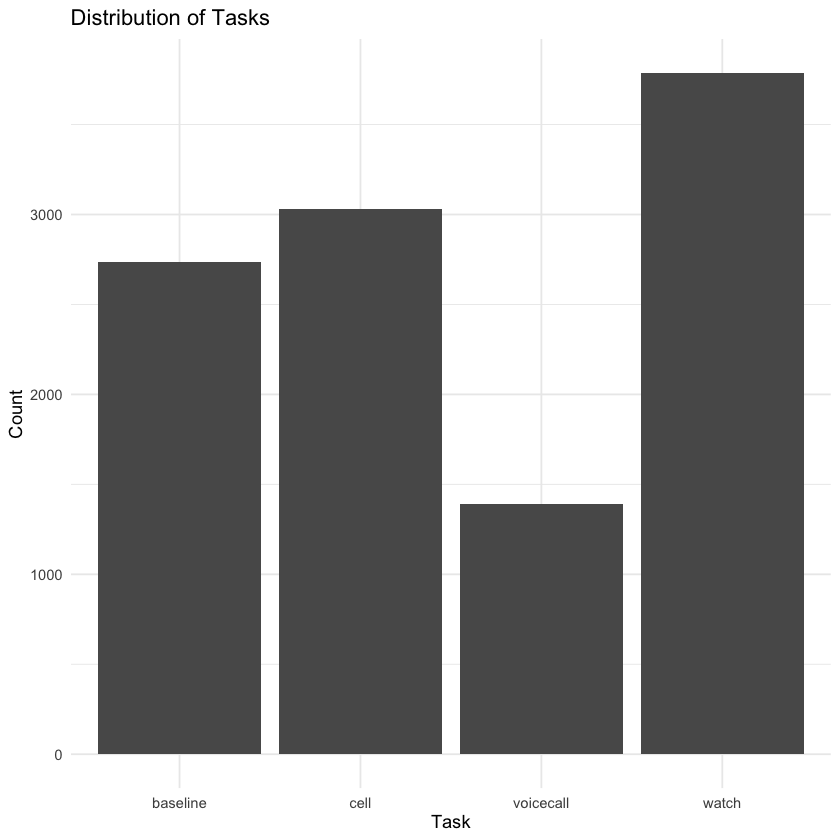

In [21]:
df |> ggplot(aes (x = task)) +
    geom_bar() +
    labs(
        title = "Distribution of Tasks",
        x = "Task",
        y = "Count"
    ) +
    theme_minimal()

The distribution shows that the frequency of task types is uneven across the dataset. The watch task appears most frequently, while the voice call task is the least common. As a result, the watch task can be considered the typical value for this categorical variable.

### Summary Statistics ###

In [22]:
df |> 
    summarize(median_hr = median(hr, na.rm = TRUE))


median_hr
<dbl>
70.47726


Heart rate (hr) was chosen as the numerical variable. The median is an appropriate measure of central tendency because the distribution of heart rate contains outliers and is not perfectly symmetric, as we have seen above. Unlike the mean, the median is less sensitive to extreme values and therefore better represents a typical heart rate in the dataset.

In [23]:
df |>
  count(task) |>
  mutate(prop = n / sum(n))


task,n,prop
<fct>,<int>,<dbl>
baseline,2736,0.2500457
cell,3028,0.2767319
voicecall,1392,0.1272162
watch,3786,0.3460062


The categorical variable task was summarized using counts and proportions. This summary is informative because it shows how frequently each task type occurs in the dataset. This helps to see if the dataset has a fair balance across variables. The watch task appears most frequently and can be considered the typical category, while voice call occurs least often, indicating some imbalance across task types.

In [24]:
df |>
  group_by(task) |>
  summarise(
    median_hr = median(hr, na.rm = TRUE),
    n = sum(!is.na(hr))
  )

task,median_hr,n
<fct>,<dbl>,<int>
baseline,68.88990,2722
cell,71.73655,2794
voicecall,70.14826,1337
watch,71.11083,3551


This table shows median values for each task, including baseline. Compared to the baseline median, other tasks' medians are slightly greater. But overall, the median heart rates are similar across. This suggests that while task type may be associated with changes in heart rate, the strength of the association appears modest based on these summary statistics.

# Research question #

**How does heart rate change from baseline when individuals perform different distraction tasks (cell, voice call, or watch)? Are some task types associated with larger changes in heart rate than others?**

To answer the question, we need to prepare appropriate data.

### Baseline heart rate variety across individuals ###

In [16]:
df_id_baseline <- 
    df |> 
    filter(task == "baseline" ,!is.na(hr)) |> 
    group_by(id) |>
    summarise(baseline_hr = median(hr))
df_id_baseline

id,baseline_hr
<fct>,<dbl>
1,73.46692
2,81.46311
3,66.58900
4,64.76909
5,80.88098
6,67.72010
7,63.05420
8,119.39291
9,73.61767


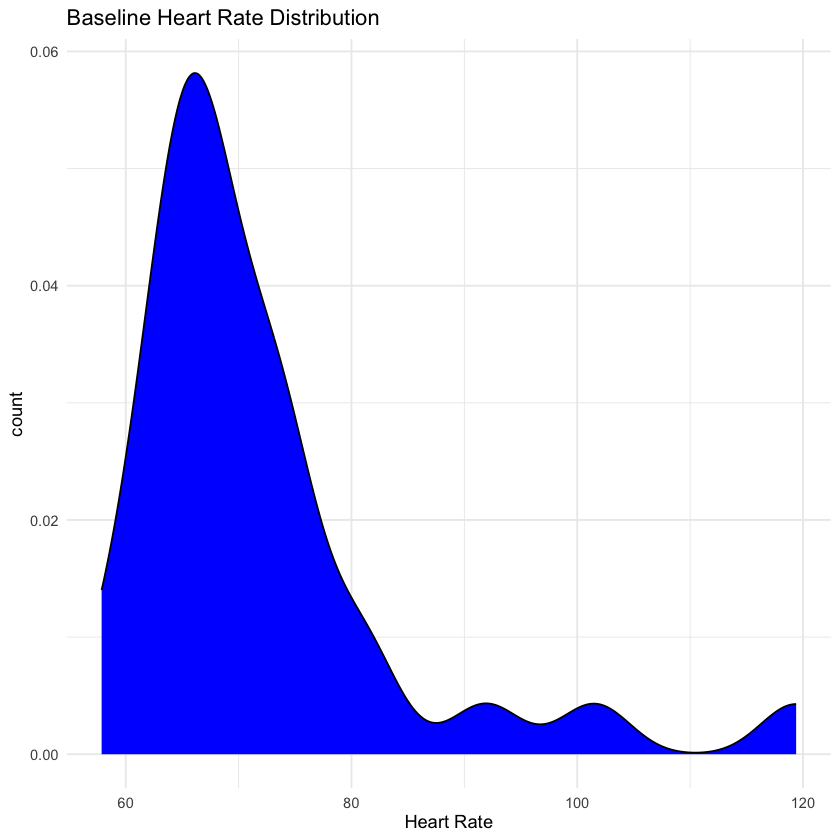

In [17]:
df_id_baseline |> 
    ggplot(aes(x = baseline_hr)) +
    geom_density(fill = "blue") +
    labs(
        x = "Heart Rate",
        y = "count",
        title = "Baseline Heart Rate Distribution"
    ) +
    theme_minimal()

In [18]:
max_baseline_dif <- df_id_baseline |>
  summarise(max_dif = max(baseline_hr) - min(baseline_hr)) 
max_baseline_dif

max_dif
<dbl>
61.52967


The baseline heart rate distribution shows substantial variability across individuals. Baseline heart rates span a wide range(61.5), indicating that individuals differ considerably. This supports the need to account for individual baseline differences when comparing heart rate across tasks.

## Data Preparation ##

We do not need to split the dataset into a train and a test set since this is not future prediction on unseen data. Here, in this research question, the goal is descriptive/comparative (understanding differences in heart rate changes across task types), so using the full dataset would be appropriate.


In [19]:
df_tasks <- df |>
  filter(task != "baseline", !is.na(hr)) |>
  left_join(df_id_baseline, by = "id")
df_tasks

id,reltime,task,occurence,eda,hr,baseline_hr
<fct>,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>
2,0,cell,1,13.87180,87.71930,81.46311
2,0,cell,2,14.69366,78.43140,81.46311
2,0,cell,3,14.36907,85.98238,81.46311
2,0,cell,4,13.66730,84.79210,81.46311
2,0,cell,5,13.31806,86.70520,81.46311
2,0,cell,6,13.14106,81.29756,81.46311
2,0,cell,7,8.80446,84.90202,81.46311
2,0,cell,8,2.98749,77.32301,81.46311
2,0,cell,9,3.75477,76.75311,81.46311


In [20]:
df_tasks <- df_tasks |>
  mutate(hr_change = hr - baseline_hr)

df_hr_change_by_task <- df_tasks |>
  group_by(id, task) |>
  summarise(
    hr_change = mean(hr_change),
    .groups = "drop"
  )
df_hr_change_by_task

id,task,hr_change
<fct>,<fct>,<dbl>
2,cell,3.4605871
2,voicecall,2.1701256
2,watch,2.8776763
3,cell,-8.8469771
3,voicecall,-6.5882644
3,watch,-5.8525697
4,cell,3.6748074
4,voicecall,3.0238333
4,watch,4.6789430


We previously used medians when summarizing raw heart rates across tasks because there were many outliers and substantial differences in baseline heart rates between participants. In this analysis, however, we focus on heart rate changes relative to each participant’s baseline, which controls for between-individual differences. Because these values represent within-person changes rather than raw heart rates, using the mean provides a reasonable summary of the average change across participants.

Each row represents a single participant–task combination. For each participant, heart rate change was calculated relative to their baseline, and the mean change was taken for each task. This results in one observation per task per participant, allowing for clean within-subject comparisons across task types. This wouldn't be affected by the variety in partipants raw heart rates.

### Description of Study Design ###

The authors aim to answer primarily causal data analysis questions, as they investigate how different notification types (smartwatch, smartphone, speaker, and texting) cause changes in driving behavior, gaze, and physiological responses. The study also involves inferential analysis, since the authors use statistical tests to conclude these effects beyond the observed sample.

***Define population and sample in this study***

* Population : Adult drivers who use smartphones or smartwatches while driving

* Sample : 31 participants. Ages 18–47. Recruited from a research panel. Mostly smartwatch users. They participated in a driving simulator study in a lab.

This study is a controlled experiment. The researchers actively controlled the independent variable (type of notification) and measured its effect on driving behavior, gaze, and physiological outcomes under fully controlled laboratory conditions. Because the experimental environment was designed by the researchers, causal conclusions about the effects of notification type are appropriate.

#### About Method ####

The researchers controlled for confounding variables primarily by ensuring that each participant completed all task conditions. This controls for individual differences such as baseline heart rate, driving ability, and attention. In addition, the study was conducted in a controlled laboratory environment with randomized task order. This helps reduce environmental and order-related confounding.\
However, one potential confounding variable is the emotional relevance of the notification content. Participants may interpret messages differently depending on their personal experiences or current emotional state, which could influence heart rate and attention independently of the device used. Even with standardized messages, personal meaning and emotional impact cannot be fully controlled and may affect the study’s outcomes.

> ##### Sampling Method

> -> The authors used a volunteer sampling method, where participants were recruited from a research panel and volunteered to take part in the study. This method was likely chosen due to the logistical, ethical, and safety constraints of conducting controlled driving simulator experiments. While this approach limits generalizability, it allows for strong internal control and precise measurement of outcomes.

> ##### Potential Bias

> -> There is a potential source of sampling bias in this study. Because participants were volunteers recruited from a research panel, not randomly picked, there might be a skewed distribution in ages (more younger people). This may limit the generalizability of the findings to older drivers or populations with different technology familiarity.

### IF I were to design this study, I would ...

increase the sample size since 31 participants may not be sufficient to capture the variability in how different drivers respond to distractions. I would also recruit a more diverse sample across age groups and try to balance the number of participants in each group. This would improve generalizability, because real-world drivers vary widely in age and familiarity with technology. Differences in technology familiarity across ages could affect the results, but I would treat that as part of the real-world context.

In terms of design, I would keep the controlled laboratory driving-simulator setting because it provides strong internal control and is safer than studying distraction in real traffic. However, I would standardize the notification content to be as simple and neutral as possible to reduce confounding due to personal relevance or emotional impact of messages. Since the main goal is to measure the effect of distraction level, I would also set minimum driving-skill requirements so that poor driving performance is less likely to be driven by inexperience. 

The authors likely used a smaller volunteer sample and a lab-based design because recruiting a larger, more representative sample is **expensive** and time-consuming, and simulator studies are much safer and easier to control than real-world driving experiments. A limitation of my proposed approach is that increasing sample size and balancing age groups would require more resources and control in the lab. Even with these trade-offs, I think the lab setting combined with a larger, more balanced sample and standardized messages would strengthen the conclusions.